# Analyzing and Visualizing Swedish Employment Data with Python and SCB API




This Python script utilizes the SCB (Statistiska centralbyrån) API to extract and analyze employment data for different regions in Sweden. It fetches quarterly employment statistics, processes the data, and visualizes trends through line plots, boxplots, and histograms using Pandas, Seaborn, and Matplotlib. The results are saved to an Excel file for further reference.





In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pyscbwrapper import SCB
from sklearn.linear_model import LinearRegression


C:\Users\DEKI_\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


###  Connecting to SCB api and navigate to the desired data

In [2]:
# Initialize SCB (Statistics Sweden) API wrapper with the language set to Swedish
scb = SCB('sv')
scb.info()

[{'id': 'AA', 'type': 'l', 'text': 'Ämnesövergripande statistik'},
 {'id': 'AM', 'type': 'l', 'text': 'Arbetsmarknad'},
 {'id': 'BE', 'type': 'l', 'text': 'Befolkning'},
 {'id': 'BO', 'type': 'l', 'text': 'Boende, byggande och bebyggelse'},
 {'id': 'EN', 'type': 'l', 'text': 'Energi'},
 {'id': 'FM', 'type': 'l', 'text': 'Finansmarknad'},
 {'id': 'HA', 'type': 'l', 'text': 'Handel med varor och tjänster'},
 {'id': 'HE', 'type': 'l', 'text': 'Hushållens ekonomi'},
 {'id': 'HS', 'type': 'l', 'text': 'Hälso- och sjukvård'},
 {'id': 'JO', 'type': 'l', 'text': 'Jord- och skogsbruk, fiske'},
 {'id': 'KU', 'type': 'l', 'text': 'Kultur och fritid'},
 {'id': 'LE', 'type': 'l', 'text': 'Levnadsförhållanden'},
 {'id': 'ME', 'type': 'l', 'text': 'Demokrati'},
 {'id': 'MI', 'type': 'l', 'text': 'Miljö'},
 {'id': 'NR', 'type': 'l', 'text': 'Nationalräkenskaper'},
 {'id': 'NV', 'type': 'l', 'text': 'Näringsverksamhet'},
 {'id': 'OE', 'type': 'l', 'text': 'Offentlig ekonomi'},
 {'id': 'PR', 'type': 'l'

In [3]:
scb.go_down('AM')
scb.info()

[{'id': 'AM0301',
  'type': 'l',
  'text': 'Arbetskostnadsindex för arbetare och tjänstemän inom privat sektor (AKI)'},
 {'id': 'AM0401', 'type': 'l', 'text': 'Arbetskraftsundersökningarna (AKU)'},
 {'id': 'AM0403',
  'type': 'l',
  'text': 'Arbetskraftsundersökningarna, tidigare definitioner'},
 {'id': 'AM0402',
  'type': 'l',
  'text': 'Arbetskraftsundersökningar, äldre serier (AKU)'},
 {'id': 'AM0501', 'type': 'l', 'text': 'Arbetsmiljöundersökningen'},
 {'id': 'AM0502', 'type': 'l', 'text': 'Arbetsorsakade besvär'},
 {'id': 'AM0210',
  'type': 'l',
  'text': 'Befolkningens arbetsmarknadsstatus (BAS)'},
 {'id': 'AM0209',
  'type': 'l',
  'text': 'Konjunkturstatistik över sjuklöner (KSju)'},
 {'id': 'AM0701',
  'type': 'l',
  'text': 'Konjunkturstatistik över vakanser (KV)'},
 {'id': 'AM0108',
  'type': 'l',
  'text': 'Konjunkturstatistik, löner för kommuner (KLK)'},
 {'id': 'AM0109',
  'type': 'l',
  'text': 'Konjunkturstatistik, löner för regioner (KLR)'},
 {'id': 'AM0101',
  'type'

In [4]:
scb.go_down('AM0401')
scb.info()

[{'id': 'AM0401A',
  'type': 'l',
  'text': 'Befolkningen efter arbetskraftstillhörighet från och med 2001'},
 {'id': 'AM0401I', 'type': 'l', 'text': 'Sysselsatta från och med 2001'},
 {'id': 'AM0401J', 'type': 'l', 'text': 'Anställda från och med 2005'},
 {'id': 'AM0401S', 'type': 'l', 'text': 'Arbetstid från och med 2001'},
 {'id': 'AM0401B',
  'type': 'l',
  'text': 'Arbetstid efter näringsgren (SNI2007) från och med 2005'},
 {'id': 'AM0401K', 'type': 'l', 'text': 'Frånvarande från och med 2005'},
 {'id': 'AM0401L', 'type': 'l', 'text': 'Arbetslösa från och med 2001'},
 {'id': 'AM0401M',
  'type': 'l',
  'text': 'Personer ej i arbetskraften från och med 2005'},
 {'id': 'AM0401O',
  'type': 'l',
  'text': 'Outnyttjat arbetskraftsutbud från och med 2001'},
 {'id': 'AM0401N',
  'type': 'l',
  'text': 'Regionala tabeller från och med 2005'},
 {'id': 'AM0401P',
  'type': 'l',
  'text': 'Utbildningens nivå och inriktning från och med 2005'},
 {'id': 'AM0401Q',
  'type': 'l',
  'text': 'Ci

In [5]:
scb.go_down('AM0401N')
scb.info()

[{'id': 'NAKUBefolkningLK',
  'type': 't',
  'text': 'Befolkningen 15-74 år (AKU) efter region, arbetskraftstillhörighet och kön. Kvartal 2005K1 - 2023K3',
  'updated': '2023-10-20T08:00:00'},
 {'id': 'NAKUBefolkningLAr',
  'type': 't',
  'text': 'Befolkningen 15-74 år (AKU) efter region, arbetskraftstillhörighet och kön. År 2005 - 2022',
  'updated': '2023-10-20T08:00:00'},
 {'id': 'NAKUOkMedArbtidLK',
  'type': 't',
  'text': 'Medelarbetstid (överenskommen) per vecka för sysselsatta 15-74 år (AKU) efter region och kön. Kvartal 2005K1 - 2023K3',
  'updated': '2023-10-20T08:00:00'},
 {'id': 'NAKUOkMedArbtidLAr',
  'type': 't',
  'text': 'Medelarbetstid (överenskommen) per vecka för sysselsatta 15-74 år (AKU) efter region och kön. År 2005 - 2022',
  'updated': '2023-10-20T08:00:00'},
 {'id': 'NAKUSysselAnkLK',
  'type': 't',
  'text': 'Sysselsatta 15-74 år (AKU) efter region, anknytningsgrad till arbetsmarknaden och kön. Kvartal 2005K1 - 2023K3',
  'updated': '2023-10-20T08:00:00'},
 {'

In [6]:
scb.go_down('NAKUSysselAnkLK')
scb.info()

{'title': 'Sysselsatta 15-74 år (AKU), 1000-tal efter region, anknytningsgrad till arbetsmarknaden, kön, tabellinnehåll och kvartal',
 'variables': [{'code': 'Region',
   'text': 'region',
   'values': ['00',
    '0050',
    '01',
    '0180',
    '03',
    '04',
    '05',
    '06',
    '07',
    '08',
    '09',
    '10',
    '12',
    '1280',
    '13',
    '14',
    '1480',
    '17',
    '18',
    '19',
    '20',
    '21',
    '22',
    '23',
    '24',
    '25'],
   'valueTexts': ['Riket',
    'Riket exkl Stockholm, Göteborg och Malmö',
    'Stockholms län',
    'Stockholm',
    'Uppsala län',
    'Södermanlands län',
    'Östergötlands län',
    'Jönköpings län',
    'Kronobergs län',
    'Kalmar län',
    'Gotlands län',
    'Blekinge län',
    'Skåne län',
    'Malmö',
    'Hallands län',
    'Västra Götalands län',
    'Göteborg',
    'Värmlands län',
    'Örebro län',
    'Västmanlands län',
    'Dalarnas län',
    'Gävleborgs län',
    'Västernorrlands län',
    'Jämtlands län',


### Get and create a dataframe with the extract data

In [7]:
# Retrieve available variables for the selected data
scb.get_variables()

{'region': ['Riket',
  'Riket exkl Stockholm, Göteborg och Malmö',
  'Stockholms län',
  'Stockholm',
  'Uppsala län',
  'Södermanlands län',
  'Östergötlands län',
  'Jönköpings län',
  'Kronobergs län',
  'Kalmar län',
  'Gotlands län',
  'Blekinge län',
  'Skåne län',
  'Malmö',
  'Hallands län',
  'Västra Götalands län',
  'Göteborg',
  'Värmlands län',
  'Örebro län',
  'Västmanlands län',
  'Dalarnas län',
  'Gävleborgs län',
  'Västernorrlands län',
  'Jämtlands län',
  'Västerbottens län',
  'Norrbottens län'],
 'anknytningsgrad till arbetsmarknaden': ['fast anställda',
  'tidsbegränsat anställda',
  'företagare + medhj hushållsmedlem',
  'sysselsatta totalt'],
 'kön': ['män', 'kvinnor', 'totalt'],
 'tabellinnehåll': ['1000-tal', 'Felmarginal ±, 1000-tal'],
 'kvartal': ['2005K1',
  '2005K2',
  '2005K3',
  '2005K4',
  '2006K1',
  '2006K2',
  '2006K3',
  '2006K4',
  '2007K1',
  '2007K2',
  '2007K3',
  '2007K4',
  '2008K1',
  '2008K2',
  '2008K3',
  '2008K4',
  '2009K1',
  '2009K2

In [8]:
# Define a list of regions for which data will be extract
region = ['Riket','Stockholm','Malmö', 'Göteborg']

# Get information about the variable 'kvartal' (quarters)
data = scb.get_variables()
kvartal_data = data['kvartal']
kvartal = kvartal_data


In [9]:
# Set the query parameters to specify regions and quarters
scb.set_query(region=region,
              kvartal=kvartal)

In [10]:
# Retrieve data for the specified query
scb_data = scb.get_data()

In [11]:
# Extract the 'data' component from the response
scb_uttag = scb_data['data']

In [12]:
scb_uttag

[{'key': ['00', '2005K1'], 'values': ['4219.2', '..']},
 {'key': ['00', '2005K2'], 'values': ['4326.6', '..']},
 {'key': ['00', '2005K3'], 'values': ['4387.9', '..']},
 {'key': ['00', '2005K4'], 'values': ['4314.1', '..']},
 {'key': ['00', '2006K1'], 'values': ['4272.2', '..']},
 {'key': ['00', '2006K2'], 'values': ['4391.9', '..']},
 {'key': ['00', '2006K3'], 'values': ['4503.6', '..']},
 {'key': ['00', '2006K4'], 'values': ['4415.8', '..']},
 {'key': ['00', '2007K1'], 'values': ['4396.9', '..']},
 {'key': ['00', '2007K2'], 'values': ['4511.9', '..']},
 {'key': ['00', '2007K3'], 'values': ['4609.3', '..']},
 {'key': ['00', '2007K4'], 'values': ['4513.8', '..']},
 {'key': ['00', '2008K1'], 'values': ['4487.1', '..']},
 {'key': ['00', '2008K2'], 'values': ['4592.1', '..']},
 {'key': ['00', '2008K3'], 'values': ['4645.6', '..']},
 {'key': ['00', '2008K4'], 'values': ['4517.3', '..']},
 {'key': ['00', '2009K1'], 'values': ['4429.2', '..']},
 {'key': ['00', '2009K2'], 'values': ['4492.3', 

### Data Transformation and Cleaning: Creating a Structured DataFrame for Employment Statistics

In [13]:
# Extract the 'data' component from the response
df = pd.DataFrame(scb_uttag)
df

,key,values
0,"[00, 2005K1]","[4219.2, ..]"
1,"[00, 2005K2]","[4326.6, ..]"
2,"[00, 2005K3]","[4387.9, ..]"
3,"[00, 2005K4]","[4314.1, ..]"
4,"[00, 2006K1]","[4272.2, ..]"
...,...,...
295,"[1480, 2022K3]","[330.2, 12.6]"
296,"[1480, 2022K4]","[326.2, 13.0]"
297,"[1480, 2023K1]","[322.1, 12.7]"
298,"[1480, 2023K2]","[326.1, 12.6]"


In [14]:
# Create a new DataFrame from the 'key' column, splitting it into two columns ('Region Code' and 'Date')
split_df = pd.DataFrame(df['key'].tolist(), columns=['Region Code','Date'])
split_df

,Region Code,Date
0,00,2005K1
1,00,2005K2
2,00,2005K3
3,00,2005K4
4,00,2006K1
...,...,...
295,1480,2022K3
296,1480,2022K4
297,1480,2023K1
298,1480,2023K2


In [15]:
# Create another DataFrame from the 'values' column, splitting it into two columns
split_df2 = pd.DataFrame(df['values'].tolist(), columns=['Sysselsättning per 1000-tal', 'Förändring Sysselsättn. %'])
split_df2

,Sysselsättning per 1000-tal,Förändring Sysselsättn. %
0,4219.2,..
1,4326.6,..
2,4387.9,..
3,4314.1,..
4,4272.2,..
...,...,...
295,330.2,12.6
296,326.2,13.0
297,322.1,12.7
298,326.1,12.6


In [16]:
# concat df and split_df
df = pd.concat([split_df, split_df2], axis=1)
# display df
df

,Region Code,Date,Sysselsättning per 1000-tal,Förändring Sysselsättn. %
0,00,2005K1,4219.2,..
1,00,2005K2,4326.6,..
2,00,2005K3,4387.9,..
3,00,2005K4,4314.1,..
4,00,2006K1,4272.2,..
...,...,...,...,...
295,1480,2022K3,330.2,12.6
296,1480,2022K4,326.2,13.0
297,1480,2023K1,322.1,12.7
298,1480,2023K2,326.1,12.6


In [17]:
region

['Riket', 'Stockholm', 'Malmö', 'Göteborg']

In [18]:
region_code = df['Region Code'].unique()
region_code

array(['00', '0180', '1280', '1480'], dtype=object)

In [19]:
conditions = [
    (df['Region Code'] == region_code[0]),
    (df['Region Code'] == region_code[1]),
    (df['Region Code'] == region_code[2]),
    (df['Region Code'] == region_code[3])
]

df['Region'] = np.select(conditions, region)

In [20]:
region[0]

'Riket'

In [21]:
region[2]

'Malmö'

In [22]:
df

,Region Code,Date,Sysselsättning per 1000-tal,Förändring Sysselsättn. %,Region
0,00,2005K1,4219.2,..,Riket
1,00,2005K2,4326.6,..,Riket
2,00,2005K3,4387.9,..,Riket
3,00,2005K4,4314.1,..,Riket
4,00,2006K1,4272.2,..,Riket
...,...,...,...,...,...
295,1480,2022K3,330.2,12.6,Göteborg
296,1480,2022K4,326.2,13.0,Göteborg
297,1480,2023K1,322.1,12.7,Göteborg
298,1480,2023K2,326.1,12.6,Göteborg


In [23]:
# Extract year and quarter
df[['Year', 'Quarter']] = df['Date'].str.extract('(\d{4})K(\d)')

# Create a new datetime column with the beginning of each quarter
df['Datetime'] = pd.to_datetime(df['Year'] + '-' + df['Quarter'].map({'1': '01-01', '2': '04-01', '3': '07-01', '4': '10-01'}))

# Drop the intermediate Year and Quarter columns if you don't need them
df = df.drop(columns=['Year', 'Quarter'])


In [24]:
df.head()

,Region Code,Date,Sysselsättning per 1000-tal,Förändring Sysselsättn. %,Region,Datetime
0,00,2005K1,4219.2,..,Riket,2005-01-01
1,00,2005K2,4326.6,..,Riket,2005-04-01
2,00,2005K3,4387.9,..,Riket,2005-07-01
3,00,2005K4,4314.1,..,Riket,2005-10-01
4,00,2006K1,4272.2,..,Riket,2006-01-01


In [25]:
# Rename 'Datetime' to 'Date' & then drop 'Datetime' column

df['Date'] = df['Datetime']
df = df.drop(columns=['Datetime', df.columns[0]])

In [26]:
df

,Date,Sysselsättning per 1000-tal,Förändring Sysselsättn. %,Region
0,2005-01-01,4219.2,..,Riket
1,2005-04-01,4326.6,..,Riket
2,2005-07-01,4387.9,..,Riket
3,2005-10-01,4314.1,..,Riket
4,2006-01-01,4272.2,..,Riket
...,...,...,...,...
295,2022-07-01,330.2,12.6,Göteborg
296,2022-10-01,326.2,13.0,Göteborg
297,2023-01-01,322.1,12.7,Göteborg
298,2023-04-01,326.1,12.6,Göteborg


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         300 non-null    datetime64[ns]
 1   Sysselsättning per 1000-tal  300 non-null    object        
 2   Förändring Sysselsättn. %    300 non-null    object        
 3   Region                       300 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 9.5+ KB


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         300 non-null    datetime64[ns]
 1   Sysselsättning per 1000-tal  300 non-null    object        
 2   Förändring Sysselsättn. %    300 non-null    object        
 3   Region                       300 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 9.5+ KB


In [29]:
# Convert columns 1 and 2 to float and column 3 to string
df['Sysselsättning per 1000-tal'] = pd.to_numeric(df['Sysselsättning per 1000-tal'], errors='coerce')
df['Förändring Sysselsättn. %'] = pd.to_numeric(df['Förändring Sysselsättn. %'].str.rstrip('%'), errors='coerce')
df['Region'] = df['Region'].astype(str)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         300 non-null    datetime64[ns]
 1   Sysselsättning per 1000-tal  300 non-null    float64       
 2   Förändring Sysselsättn. %    44 non-null     float64       
 3   Region                       300 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 9.5+ KB


In [31]:
# Drop the second column
df.drop(df.columns[2], axis=1, inplace=True)
df.head()

,Date,Sysselsättning per 1000-tal,Region
0,2005-01-01,4219.2,Riket
1,2005-04-01,4326.6,Riket
2,2005-07-01,4387.9,Riket
3,2005-10-01,4314.1,Riket
4,2006-01-01,4272.2,Riket


In [32]:
df['Region'].unique()

array(['Riket', 'Stockholm', 'Malmö', 'Göteborg'], dtype=object)

### Data Visualization and Export: Creating Visualizations and Saving Results to Excel

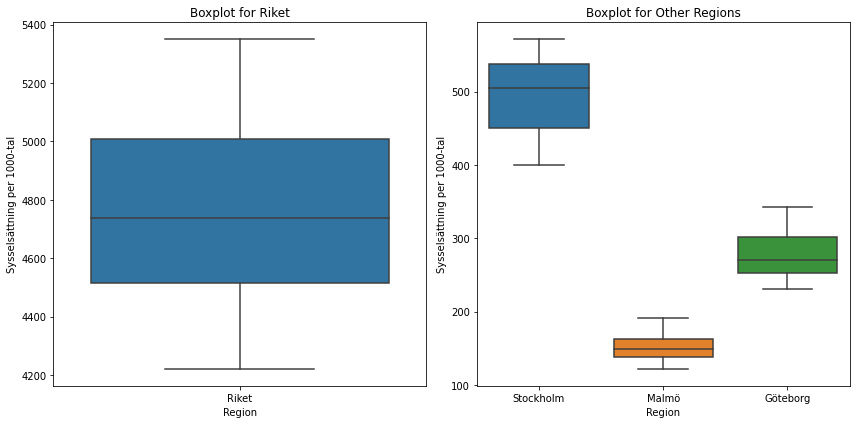

In [33]:

# Filter the DataFrame for 'Riket' and non-'Riket' regions
riket_df = df[df['Region'] == 'Riket']
other_regions_df = df[df['Region'] != 'Riket']

# Create separate boxplots for 'Riket' and non-'Riket' regions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=riket_df, x='Region', y='Sysselsättning per 1000-tal')
plt.title('Boxplot for Riket')
plt.xlabel('Region')
plt.ylabel('Sysselsättning per 1000-tal')

plt.subplot(1, 2, 2)
sns.boxplot(data=other_regions_df, x='Region', y='Sysselsättning per 1000-tal')
plt.title('Boxplot for Other Regions')
plt.xlabel('Region')
plt.ylabel('Sysselsättning per 1000-tal')

plt.tight_layout()
plt.show()

In [34]:
df

,Date,Sysselsättning per 1000-tal,Region
0,2005-01-01,4219.2,Riket
1,2005-04-01,4326.6,Riket
2,2005-07-01,4387.9,Riket
3,2005-10-01,4314.1,Riket
4,2006-01-01,4272.2,Riket
...,...,...,...
295,2022-07-01,330.2,Göteborg
296,2022-10-01,326.2,Göteborg
297,2023-01-01,322.1,Göteborg
298,2023-04-01,326.1,Göteborg


In [35]:
df.Region.unique()

array(['Riket', 'Stockholm', 'Malmö', 'Göteborg'], dtype=object)

In [36]:
# Pivot the dataframe to get different columns for each region
df_pivot = df.pivot(index='Date', columns='Region', values='Sysselsättning per 1000-tal')

# Display the resulting dataframe
df_pivot


Region,Göteborg,Malmö,Riket,Stockholm
Date,,,,
2005-01-01,230.6,123.8,4219.2,415.4
2005-04-01,241.9,123.0,4326.6,399.3
2005-07-01,242.7,123.9,4387.9,406.5
2005-10-01,234.3,121.3,4314.1,408.4
2006-01-01,234.5,122.2,4272.2,407.2
...,...,...,...,...
2022-07-01,330.2,180.5,5295.2,559.6
2022-10-01,326.2,175.1,5197.7,555.1
2023-01-01,322.1,184.5,5191.5,559.1


In [37]:
# Resample the DataFrame to monthly frequency and interpolate missing values
df_monthly = df_pivot.resample('MS').first()
df = round(df_monthly.interpolate(), 2)
df_monthly

Region,Göteborg,Malmö,Riket,Stockholm
Date,,,,
2005-01-01,230.6,123.8,4219.2,415.4
2005-02-01,NaN,NaN,NaN,NaN
2005-03-01,NaN,NaN,NaN,NaN
2005-04-01,241.9,123.0,4326.6,399.3
2005-05-01,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-03-01,NaN,NaN,NaN,NaN
2023-04-01,326.1,191.2,5312.3,566.6
2023-05-01,NaN,NaN,NaN,NaN


In [38]:
df.dtypes

Region
Göteborg     float64
Malmö        float64
Riket        float64
Stockholm    float64
dtype: object

In [39]:
df

Region,Göteborg,Malmö,Riket,Stockholm
Date,,,,
2005-01-01,230.60,123.80,4219.20,415.40
2005-02-01,234.37,123.53,4255.00,410.03
2005-03-01,238.13,123.27,4290.80,404.67
2005-04-01,241.90,123.00,4326.60,399.30
2005-05-01,242.17,123.30,4347.03,401.70
...,...,...,...,...
2023-03-01,324.77,188.97,5272.03,564.10
2023-04-01,326.10,191.20,5312.30,566.60
2023-05-01,331.53,190.77,5325.17,567.10


In [40]:
def plot_data_with_trendline(df, include_trendline=False):
    """
    Plot line charts for each column in the DataFrame with an optional trendline.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing time-series data.
    - include_trendline (bool, optional): Whether to include a trendline in the plot. Default is False.

    Returns:
    None
    
    # Example usage:
    # plot_data_with_trendline(your_dataframe, include_trendline=True)  # Include trendline
    # plot_data_with_trendline(your_dataframe, include_trendline=False)  # Exclude trendline

    """
    # Generate an extended date range to cover the entire period
    start_date = pd.to_datetime('2000-01-01')
    end_date = pd.to_datetime('2023-09-01')
    extended_index = pd.date_range(start=start_date, end=end_date, freq='MS')

    # Make sure the DataFrame has the extended index
    df = df.reindex(extended_index)

    # Calculate the standard deviation for each column
    std_dev = df.std()

    # Fill missing values using the forward fill method
    df = df.ffill()

    # Set up the plot layout
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
    axes = axes.flatten()

    # Iterate through each column for plotting
    for i, (column, color) in enumerate(zip(df.columns, sns.color_palette("husl", len(df.columns)))):
        # Plot the original data
        sns.lineplot(x=df.index, y=df[column], ax=axes[i], color=color, label=column, linewidth=2)

        # Optionally, add a trendline
        if include_trendline:
            # Fit a linear trend line using polyfit
            trend_line_coeff = np.polyfit(range(len(df)), df[column], 1)
            trend_line = np.polyval(trend_line_coeff, range(len(df)))

            # Plot the trend line in black
            axes[i].plot(df.index, trend_line, color='black', linestyle='--', label='Trend Line', linewidth=2)

        # Set plot attributes
        axes[i].set_title(column)
        axes[i].set_xlabel('Datum')
        axes[i].set_ylabel('Sysselsättning')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend()

    # Remove empty subplots if there are more subplots than columns
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the plot
    plt.show()

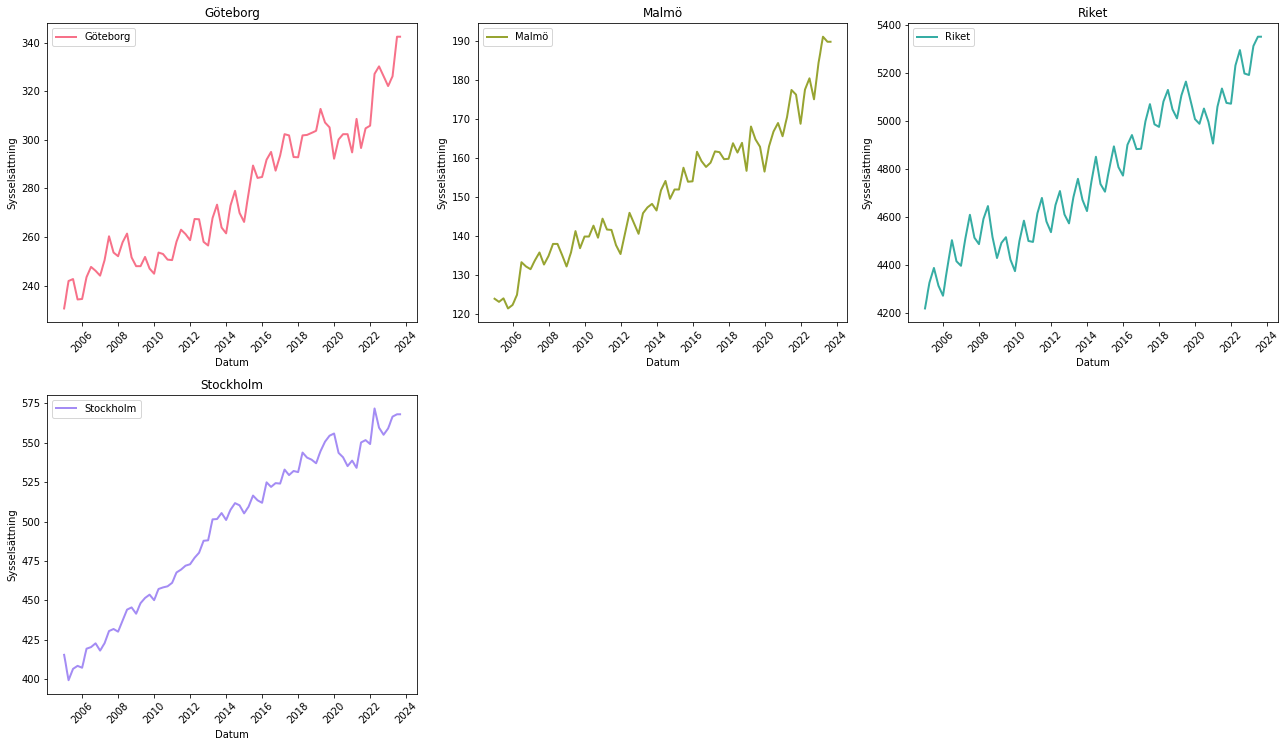

In [41]:
plot_data_with_trendline(df)

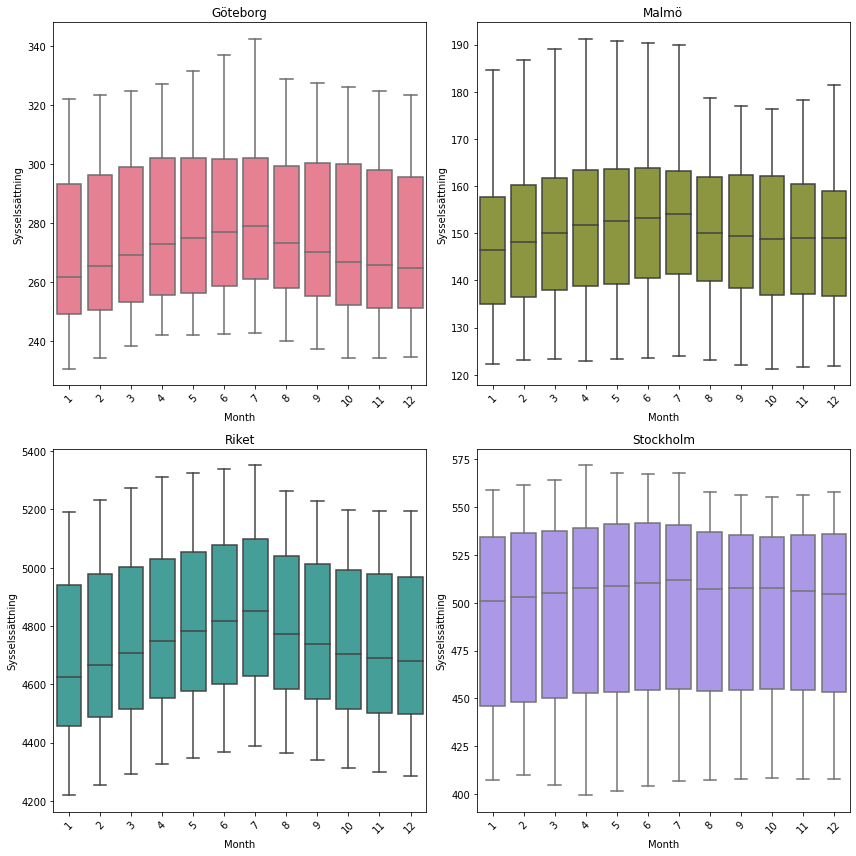

In [42]:
# Define a color palette with different colors for each boxplot
palette = sns.color_palette("husl", len(df.columns))

# Set the figure size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Loop through each column and create a separate boxplot with different color
for i, (column, color) in enumerate(zip(df.columns, palette)):
    sns.boxplot(x=df.index.month, y=df[column], ax=axes[i], color=color)
    axes[i].set_title(column)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Sysselssättning')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

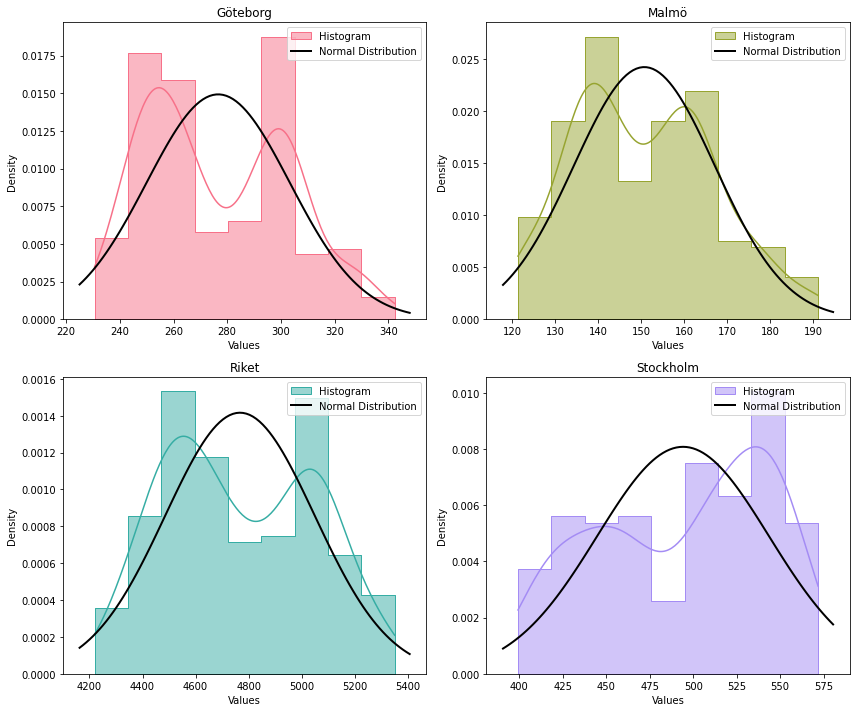

In [43]:
from scipy.stats import norm

# Define a color palette with different colors for each histogram
palette = sns.color_palette("husl", len(df.columns))

# Calculate the number of rows and columns needed for the subplots
num_cols = min(len(df.columns), 2)
num_rows = -(-len(df.columns) // num_cols)  # Ceiling division

# Set the figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Loop through each column and create a separate histogram with a normal distribution curve
for i, (column, color) in enumerate(zip(df.columns, palette)):
    # Plot histogram
    sns.histplot(df[column], kde=True, ax=axes[i], color=color, label='Histogram', element="step", stat="density")
    
    # Plot normal distribution curve
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    mu, std = df[column].mean(), df[column].std()
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'k', linewidth=2, label='Normal Distribution')
    
    axes[i].set_title(column)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


In [44]:
df

Region,Göteborg,Malmö,Riket,Stockholm
Date,,,,
2005-01-01,230.60,123.80,4219.20,415.40
2005-02-01,234.37,123.53,4255.00,410.03
2005-03-01,238.13,123.27,4290.80,404.67
2005-04-01,241.90,123.00,4326.60,399.30
2005-05-01,242.17,123.30,4347.03,401.70
...,...,...,...,...
2023-03-01,324.77,188.97,5272.03,564.10
2023-04-01,326.10,191.20,5312.30,566.60
2023-05-01,331.53,190.77,5325.17,567.10


In [45]:
# Extend Index
start_date = pd.to_datetime('2000-01-01')
end_date = pd.to_datetime('2023-09-01')
extended_index = pd.date_range(start=start_date, end=end_date, freq='MS')

# Reindex the DataFrame with the extended index
df = df.reindex(extended_index)

# Calculate Standard Deviation
std_dev = df.std()

In [46]:
std_dev

Region
Göteborg      26.718767
Malmö         16.482304
Riket        281.647836
Stockholm     49.382786
dtype: float64

In [47]:
df = df.ffill()

In [48]:
# Step 3-4: Backcast Data using Linear Regression
# Create a DataFrame with features (Date) and target (each column)
df_train = df.dropna()  # Drop rows with missing values
X_train = pd.to_numeric(df_train.index).values.reshape(-1, 1)

In [49]:
# Iterate over each column and perform backcasting
for col in df.columns:
    y_train = df_train[col].values.reshape(-1, 1)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the missing values (backcast)
    df_missing = df[df[col].isnull()]
    X_missing = pd.to_numeric(df_missing.index).values.reshape(-1, 1)
    y_backcast = model.predict(X_missing)

    # Fill backcasted values into the original DataFrame
    df.loc[df[col].isnull(), col] = y_backcast.flatten()

# Print the final DataFrame
df.head()

Region,Göteborg,Malmö,Riket,Stockholm
2000-01-01,207.983217,107.851976,4045.849191,365.694642
2000-02-01,208.393298,108.107910,4050.153283,366.459388
2000-03-01,208.776922,108.347332,4054.179693,367.174796
2000-04-01,209.187003,108.603266,4058.483786,367.939542
2000-05-01,209.583856,108.850944,4062.649037,368.679619


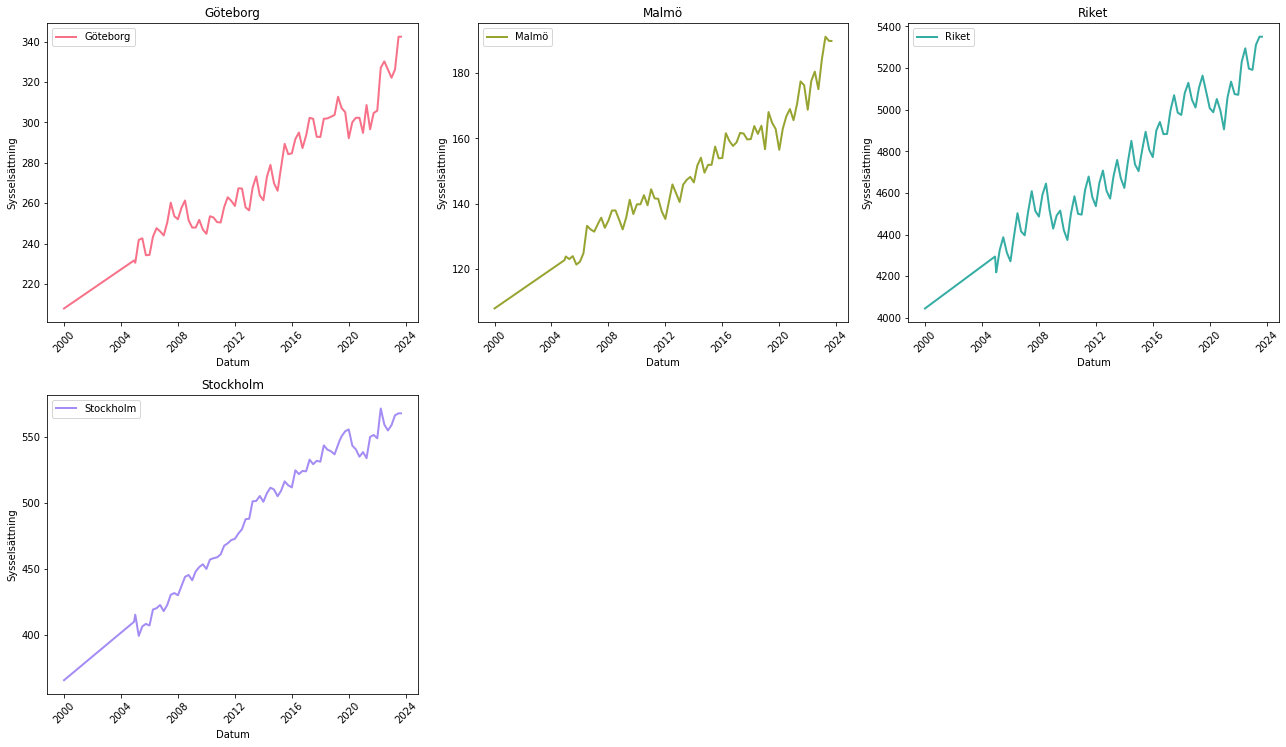

In [50]:
# Plot linecharts without trendline
plot_data_with_trendline(df, include_trendline=False)

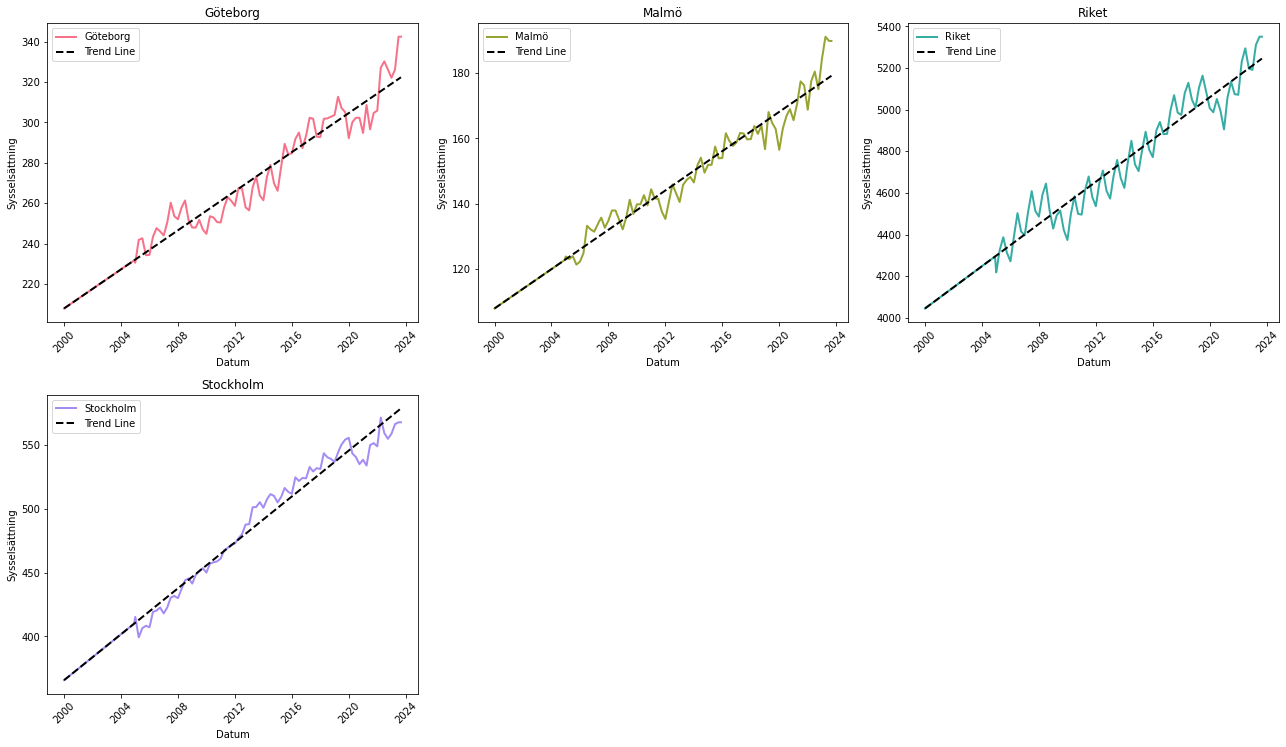

In [51]:
# Plot linecharts with trendline
plot_data_with_trendline(df,include_trendline=True)

In [52]:
# Cheack data
start_date_check = pd.to_datetime('2004-01-01')
end_date_check = pd.to_datetime('2006-01-01')

# Filter the DataFrame for the specified date range
data_check = df.loc[(df.index >= start_date_check) & (df.index <= end_date_check)]

# Print the filtered data
data_check


Region,Göteborg,Malmö,Riket,Stockholm
2004-01-01,227.309941,119.913900,4248.696918,401.736393
2004-02-01,227.720022,120.169834,4253.001011,402.501139
2004-03-01,228.103646,120.409256,4257.027420,403.216547
2004-04-01,228.513728,120.665191,4261.331513,403.981293
2004-05-01,228.910580,120.912869,4265.496764,404.721370
2004-06-01,229.320661,121.168803,4269.800856,405.486117
2004-07-01,229.717514,121.416481,4273.966108,406.226194
2004-08-01,230.127595,121.672415,4278.270200,406.990940
2004-09-01,230.537676,121.928349,4282.574293,407.755686
2004-10-01,230.934529,122.176027,4286.739544,408.495763


In [53]:
df.to_excel('employment2.xlsx', index=True)
